In [18]:
import pandas as pd

# Load the dataset
file_path = r"C:/Users/amira\Downloads/Liverpool sheet.csv"
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())

      Season  Predicted Position  Predicted Points  Actual Position  Wins  \
0  2016-2017                   5                68                4    22   
1  2017-2018                   4                70                4    21   
2  2018-2019                   3                78                2    30   
3  2019-2020                   2                85                1    32   
4  2020-2021                   1                90                3    20   

   Losses  Draws Win Probability  Actual Points  Goal Difference  
0       6     10           57.89             76               36  
1       5     12           55,26             75               46  
2       1      7           78.95             97               67  
3       3      3           84.21             99               52  
4       6     12           52.63             69               26  


In [19]:
# Fix the "Win Probability" column (replace commas with periods and convert to float)
data["Win Probability"] = data["Win Probability"].str.replace(",", ".").astype(float)

# Define features (X) and targets (y_position, y_points)
X = data.drop(["Season", "Predicted Position", "Predicted Points", "Actual Position", "Actual Points"], axis=1)
y_position = data["Actual Position"]  # Target: Actual Position
y_points = data["Actual Points"]      # Target: Actual Points

# Display features and targets
print("Features:\n", X.head())
print("Target (Position):\n", y_position.head())
print("Target (Points):\n", y_points.head())

Features:
    Wins  Losses  Draws  Win Probability  Goal Difference
0    22       6     10            57.89               36
1    21       5     12            55.26               46
2    30       1      7            78.95               67
3    32       3      3            84.21               52
4    20       6     12            52.63               26
Target (Position):
 0    4
1    4
2    2
3    1
4    3
Name: Actual Position, dtype: int64
Target (Points):
 0    76
1    75
2    97
3    99
4    69
Name: Actual Points, dtype: int64


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train_position, y_test_position = train_test_split(X, y_position, test_size=0.2, random_state=42)
X_train, X_test, y_train_points, y_test_points = train_test_split(X, y_points, test_size=0.2, random_state=42)

# Train the model for position
model_position = RandomForestRegressor(random_state=42, n_estimators=100)
model_position.fit(X_train, y_train_position)

# Train the model for points
model_points = RandomForestRegressor(random_state=42, n_estimators=100)
model_points.fit(X_train, y_train_points)

# Evaluate the models
y_pred_position = model_position.predict(X_test)
y_pred_points = model_points.predict(X_test)

print("Position Model - RMSE:", mean_squared_error(y_test_position, y_pred_position, squared=False))
print("Position Model - R2 Score:", r2_score(y_test_position, y_pred_position))

print("Points Model - RMSE:", mean_squared_error(y_test_points, y_pred_points, squared=False))
print("Points Model - R2 Score:", r2_score(y_test_points, y_pred_points))

Position Model - RMSE: 0.5310837975310488
Position Model - R2 Score: 0.71795
Points Model - RMSE: 1.7399425277864722
Points Model - R2 Score: 0.9580982698961941


c:\Users\amira\.jupyter\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\amira\.jupyter\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [21]:
# Define the input data for 2024-2025
# Replace these values with the actual stats for 2024-2025
new_data_2025 = {
    "Wins": 18,  # Example: 18 wins (as of now)
    "Losses": 1,  # Example: 1 loss (as of now)
    "Draws": 6,  # Example: 6 draws (as of now)
    "Win Probability": 72,  # Example: 72% win probability
    "Goal Difference": 36  # Example: Goal difference of 36
}

# Convert to DataFrame
new_df_2025 = pd.DataFrame([new_data_2025])

# Predict position and points
predicted_position_2025 = model_position.predict(new_df_2025)
predicted_points_2025 = model_points.predict(new_df_2025)

print(f"Predicted Position for 2024-2025: {predicted_position_2025[0]:.2f}")
print(f"Predicted Points for 2024-2025: {predicted_points_2025[0]:.2f}")

Predicted Position for 2024-2025: 2.98
Predicted Points for 2024-2025: 84.89


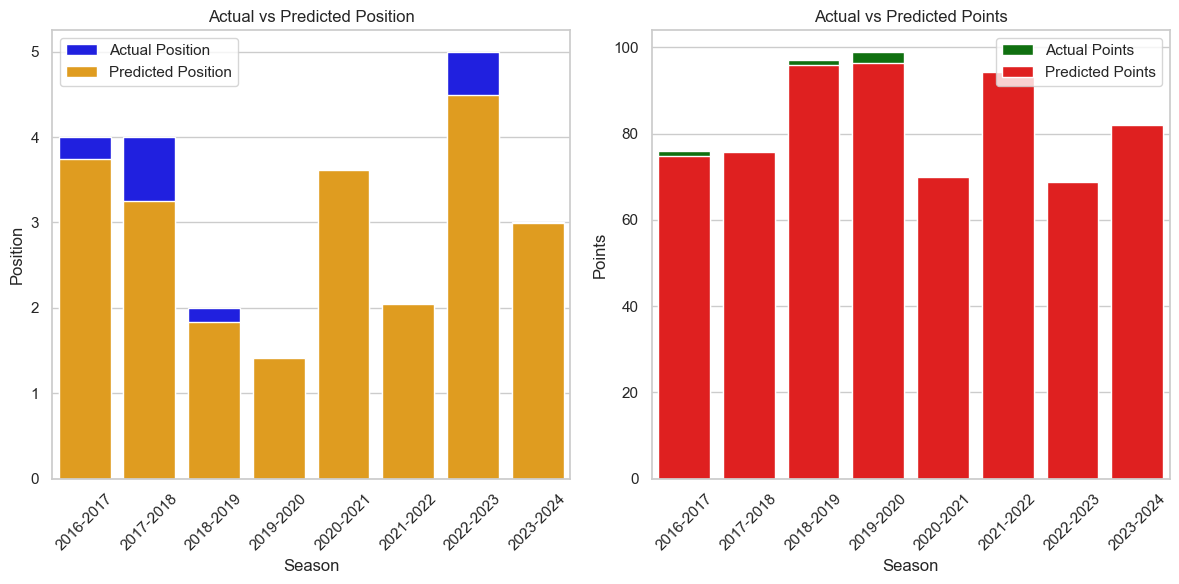

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="whitegrid")

# Add predicted values to the dataset
data["Predicted Position"] = model_position.predict(X)
data["Predicted Points"] = model_points.predict(X)

# Bar plot for predicted vs actual position and points
plt.figure(figsize=(12, 6))

# Predicted vs Actual Position
plt.subplot(1, 2, 1)
sns.barplot(x="Season", y="Actual Position", data=data, color="blue", label="Actual Position")
sns.barplot(x="Season", y="Predicted Position", data=data, color="orange", label="Predicted Position")
plt.xticks(rotation=45)
plt.ylabel("Position")
plt.title("Actual vs Predicted Position")
plt.legend()

# Predicted vs Actual Points
plt.subplot(1, 2, 2)
sns.barplot(x="Season", y="Actual Points", data=data, color="green", label="Actual Points")
sns.barplot(x="Season", y="Predicted Points", data=data, color="red", label="Predicted Points")
plt.xticks(rotation=45)
plt.ylabel("Points")
plt.title("Actual vs Predicted Points")
plt.legend()

plt.tight_layout()
plt.show()

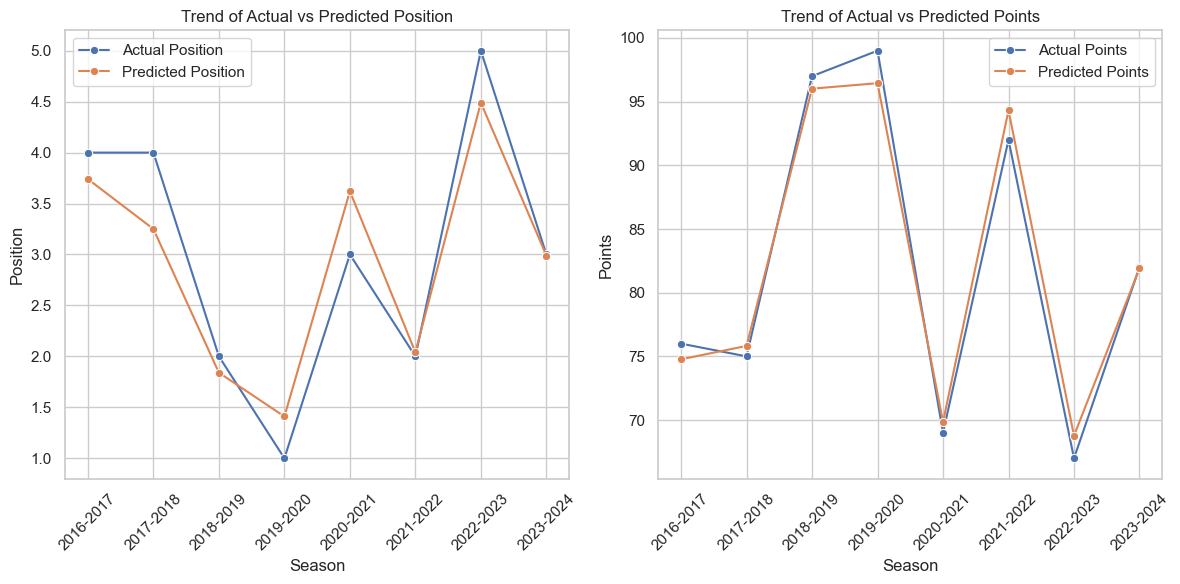

In [24]:
# Line plot for trends over seasons
plt.figure(figsize=(12, 6))

# Actual vs Predicted Position
plt.subplot(1, 2, 1)
sns.lineplot(x="Season", y="Actual Position", data=data, marker="o", label="Actual Position")
sns.lineplot(x="Season", y="Predicted Position", data=data, marker="o", label="Predicted Position")
plt.xticks(rotation=45)
plt.ylabel("Position")
plt.title("Trend of Actual vs Predicted Position")
plt.legend()

# Actual vs Predicted Points
plt.subplot(1, 2, 2)
sns.lineplot(x="Season", y="Actual Points", data=data, marker="o", label="Actual Points")
sns.lineplot(x="Season", y="Predicted Points", data=data, marker="o", label="Predicted Points")
plt.xticks(rotation=45)
plt.ylabel("Points")
plt.title("Trend of Actual vs Predicted Points")
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\amira\AppData\Local\Temp\ipykernel_18856\362490852.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Metric", y="Value", data=predicted_df_2025, palette=["blue", "green"])


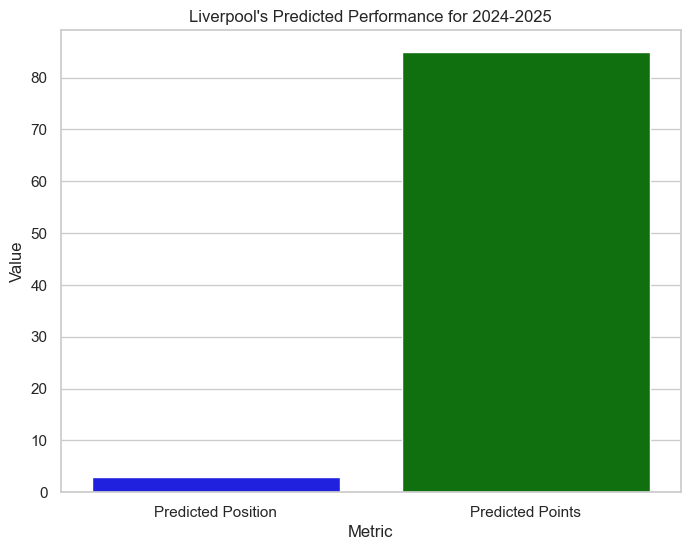

In [25]:
# Data for 2024-2025 predictions
predicted_data_2025 = {
    "Metric": ["Predicted Position", "Predicted Points"],
    "Value": [predicted_position_2025[0], predicted_points_2025[0]]
}

# Convert to DataFrame
predicted_df_2025 = pd.DataFrame(predicted_data_2025)

# Bar plot for 2024-2025 predictions
plt.figure(figsize=(8, 6))
sns.barplot(x="Metric", y="Value", data=predicted_df_2025, palette=["blue", "green"])
plt.ylabel("Value")
plt.title("Liverpool's Predicted Performance for 2024-2025")
plt.show()